In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf
import sklearn as skl
import keras as kr

In [ ]:
df = pd.read_csv("/content/Uber.csv")

In [ ]:
df.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [ ]:
df.shape

(354, 4)

In [ ]:
df.describe()

,active_vehicles,trips
count,354.000000,354.000000
mean,1307.435028,11667.316384
std,1162.510626,10648.284865
min,112.000000,629.000000
25%,296.750000,2408.500000
50%,1077.000000,9601.000000
75%,1417.000000,13711.250000
max,4395.000000,45858.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   dispatching_base_number  354 non-null    object
 1   date                     354 non-null    object
 2   active_vehicles          354 non-null    int64 
 3   trips                    354 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 11.2+ KB


In [ ]:
df.isnull().sum()

,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

In [ ]:
df

,dispatching_base_number,date,active_vehicles,trips,day,month,year
0,B02512,2015-01-01,190,1132,1,1,2015
1,B02765,2015-01-01,225,1765,1,1,2015
2,B02764,2015-01-01,3427,29421,1,1,2015
3,B02682,2015-01-01,945,7679,1,1,2015
4,B02617,2015-01-01,1228,9537,1,1,2015
...,...,...,...,...,...,...,...
349,B02764,2015-02-28,3952,39812,28,2,2015
350,B02617,2015-02-28,1372,14022,28,2,2015
351,B02682,2015-02-28,1386,14472,28,2,2015
352,B02512,2015-02-28,230,1803,28,2,2015


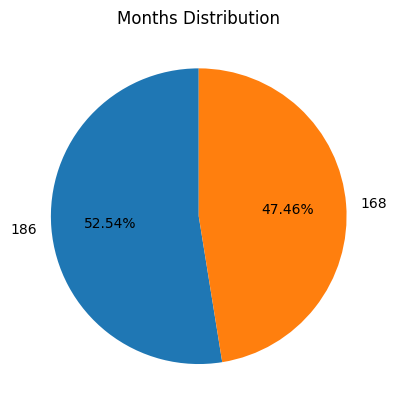

In [ ]:
months_count = df['month'].value_counts()
plt.pie(months_count, labels=months_count, autopct='%1.2f%%', startangle=90)
plt.title('Months Distribution')
plt.show()

In [ ]:
df['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

In [ ]:
df['date_ordinal'] = df['date'].apply(lambda date: date.toordinal())

In [ ]:
df = pd.get_dummies(df, columns=['dispatching_base_number'], drop_first=True)

In [ ]:
x = df.drop(columns=['date','trips','day','month','year'])
y = df['trips']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([39102.74,  1905.69,  9869.78,  1718.09,  8942.84, 12567.89,
        6987.43,  1456.51,  1522.82, 37062.54, 12050.  , 13288.63,
       14210.6 ,  1956.99, 11760.83,  7247.85,  8468.31, 30310.04,
       14017.95,  5894.37, 12668.88,  1920.04, 33232.35,  1454.74,
        4948.82,  5353.11,  1756.42, 11683.74,  7485.13,  8491.51,
        9531.6 ,  6824.28, 37397.29,  6774.  , 31573.66,  2084.49,
        8642.23, 10454.65,  1548.58, 12496.99, 38850.9 , 28272.23,
       16206.71,  1681.79,  1911.33,  2038.96, 10829.28,  6667.79,
       10400.5 ,  8469.43,  8740.77, 11962.02, 34877.89, 31629.58,
       12378.44, 11305.49,  7568.97, 11628.71, 30741.42, 11353.79,
       24381.82, 32390.94, 14178.55,  8720.13,  1945.8 ,  1618.83,
        7293.45,  9112.07, 12650.44, 10496.45,  8494.48,  1680.66,
       11661.04, 14509.94, 12587.92,  1552.41, 15304.44, 10923.51,
         969.56, 34536.1 ,  3103.49,  9767.49,  2514.79,  9119.72,
       12031.77,  1778.92,  1699.1 ,   869.53,  8260.6 ,  1698

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

Mean Squared Error: 4329961.588016823
R^2 Score: 0.9639806622008842


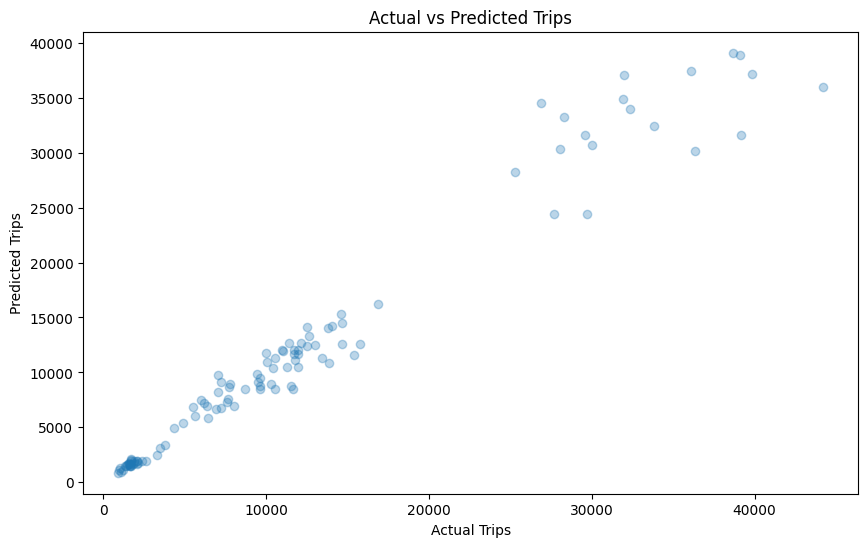

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('Actual Trips')
plt.ylabel('Predicted Trips')
plt.title('Actual vs Predicted Trips')
plt.show()

In [ ]:
import pickle
filename = 'Uber_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)
print(f"Model saved as {filename}")

Model saved as Uber_model.pkl


In [ ]:
x_test

,active_vehicles,date_ordinal,dispatching_base_number_B02598,dispatching_base_number_B02617,dispatching_base_number_B02682,dispatching_base_number_B02764,dispatching_base_number_B02765
220,4170,735635,False,False,False,True,False
42,262,735606,False,False,False,False,True
286,1066,735646,True,False,False,False,False
181,225,735629,False,False,False,False,False
56,949,735608,True,False,False,False,False
...,...,...,...,...,...,...,...
233,176,735637,False,False,False,False,False
194,275,735631,False,False,False,False,True
250,450,735640,False,False,False,False,True
349,3952,735657,False,False,False,True,False


In [ ]:
pred = model.predict(x_test)
pred

array([39102.74,  1905.69,  9869.78,  1718.09,  8942.84, 12567.89,
        6987.43,  1456.51,  1522.82, 37062.54, 12050.  , 13288.63,
       14210.6 ,  1956.99, 11760.83,  7247.85,  8468.31, 30310.04,
       14017.95,  5894.37, 12668.88,  1920.04, 33232.35,  1454.74,
        4948.82,  5353.11,  1756.42, 11683.74,  7485.13,  8491.51,
        9531.6 ,  6824.28, 37397.29,  6774.  , 31573.66,  2084.49,
        8642.23, 10454.65,  1548.58, 12496.99, 38850.9 , 28272.23,
       16206.71,  1681.79,  1911.33,  2038.96, 10829.28,  6667.79,
       10400.5 ,  8469.43,  8740.77, 11962.02, 34877.89, 31629.58,
       12378.44, 11305.49,  7568.97, 11628.71, 30741.42, 11353.79,
       24381.82, 32390.94, 14178.55,  8720.13,  1945.8 ,  1618.83,
        7293.45,  9112.07, 12650.44, 10496.45,  8494.48,  1680.66,
       11661.04, 14509.94, 12587.92,  1552.41, 15304.44, 10923.51,
         969.56, 34536.1 ,  3103.49,  9767.49,  2514.79,  9119.72,
       12031.77,  1778.92,  1699.1 ,   869.53,  8260.6 ,  1698

In [ ]:
x_testo =  x_test.head(1)

In [ ]:
y_predo = model.predict(x_testo)
y_predo

array([39102.74])